# 朴素贝叶斯算法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## 数学原理

贝叶斯公式：$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $

多个特征变量的贝叶斯公式：$ P(Y|X_1, X_2, \dots, X_n) = \frac{P(X_1, X_2, \dots, X_n | Y) \cdot P(Y)}{P(X_1, X_2, \dots, X_n)} $

朴素贝叶斯模型则假设各个特征变量间相互独立，则：$ P(X_1, X_2, \dots, X_n) = P(X_1) \cdot P(X_2) \cdots P(X_n) $

### 高斯朴素贝叶斯

很多连续型变量概率不易计算

In [3]:
from sklearn.datasets._samples_generator import make_blobs

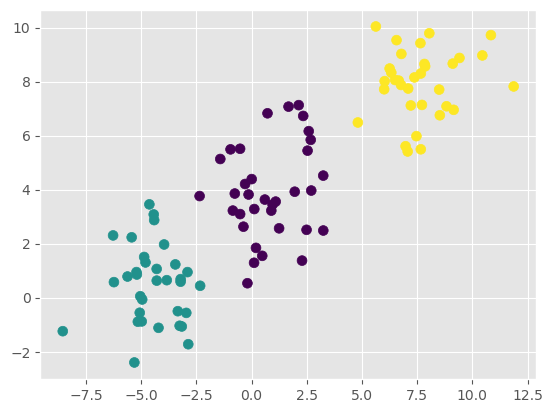

In [4]:
X, y_true = make_blobs(n_samples=100, centers=3, random_state=3, cluster_std=1.5)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y_true, s=50)

可以假定数据服从高斯分布（正态分布），使用正态分布计算概率

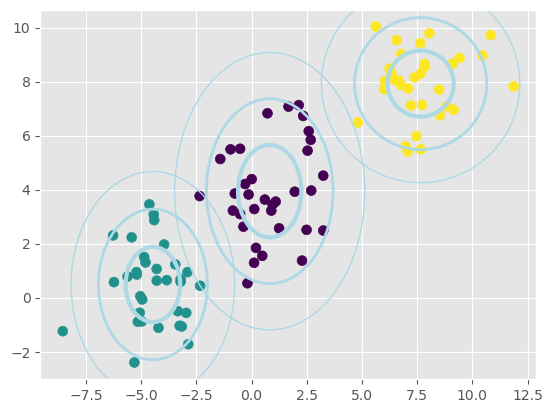

In [5]:
from matplotlib.patches import Ellipse
for g in range(3):  # enumerate(['#21918C', '#440154', '#d2c951'])
    X_group = X[y_true == g]
    for e in range(1, 4):
        ax.add_artist(Ellipse(xy = (X_group[:, 0].mean(), X_group[:, 1].mean()), 
                      width = X_group[:, 0].std() * 2 * e, height = X_group[:, 1].std() * 2 * e,
                      facecolor='none', edgecolor='lightblue', linewidth=4 - e))
fig

In [6]:
gaussian_proba = lambda x, mean, std: (1 / np.sqrt(2 * np.pi) / std * np.exp(
        -(x - mean) ** 2 / (2 * std ** 2)))

In [7]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y_true)

GaussianNB()

决策边界可视化

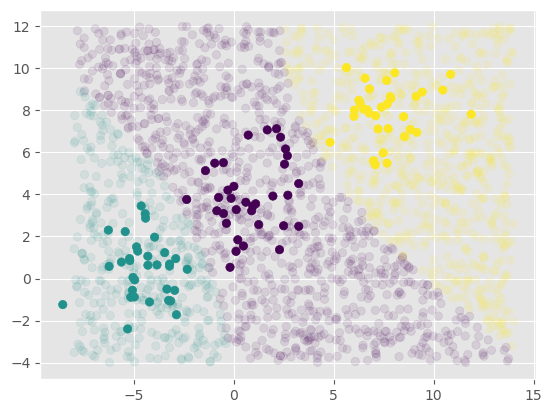

In [8]:
rand = np.random.RandomState(3)
__X_noise = rand.rand(2000, 2) * [22, 16] + [-8, -4]
__y_noise = model.predict(__X_noise)

plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.scatter(__X_noise[:, 0], __X_noise[:, 1], c=__y_noise, alpha=0.1)

计算结果

In [9]:
model.theta_[0]  # mu (mean)

array([0.82083046, 3.94121607])

In [10]:
model.var_[0]   # sigma ** 2 (variance)

array([2.05995969, 2.92921668])

贝叶斯模型支持概率分类

In [11]:
model.predict_proba([[-2, 2], [5, 4]])

array([[4.23140192e-01, 5.76859808e-01, 5.44257518e-14],
       [9.02345446e-01, 6.10995956e-13, 9.76545538e-02]])

## 案例：垃圾邮件检测

### 数据预处理：词袋模型

词袋模型的概念：将为本转换为独热向量

In [12]:
texts = ['John likes to watch movies. Mary likes movies too.',
         'Mary also likes to watch football games.']

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(texts)
count_vect.vocabulary_

{'john': 3,
 'likes': 4,
 'to': 7,
 'watch': 9,
 'movies': 6,
 'mary': 5,
 'too': 8,
 'also': 0,
 'football': 1,
 'games': 2}

In [13]:
pd.DataFrame(count_vect.transform([texts[0]]).toarray(), columns=count_vect.get_feature_names_out())

,also,football,games,john,likes,mary,movies,to,too,watch
0,0,0,0,1,2,1,2,1,1,1


In [14]:
vec = count_vect.transform([
    'Tim likes to play games and watch baseball games.'])
pd.DataFrame(vec.toarray(), columns=count_vect.get_feature_names_out())

,also,football,games,john,likes,mary,movies,to,too,watch
0,0,0,2,0,1,0,0,1,0,1


### 使用多项式贝叶斯模型

读取数据

In [15]:
mail = pd.read_table('dataset/SMSSpamCollection.txt', names=['label', 'text'])
mail.head(3)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


将文本标签映射为数值数据

In [16]:
mail['label'] = mail['label'].map({'ham': 0, 'spam': 1})

使用词袋模型处理

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
X = count_vect.fit_transform(mail['text'])

建立朴素贝叶斯模型

In [18]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, mail['label'])

MultinomialNB()

预测

In [19]:
model.predict(
    count_vect.transform(
        ['Interested in trying out our product? '
         'Here’s a special deal for newsletter subscribers: '
         'get 1 years of it with 3 months of extra subscription time added on top.'])
)

array([1], dtype=int64)